In [1]:
from monte_carlo import monte_carlo
import numpy as np

def getenergy(count):
    density, temp = 0.1, 1.0
    step = count*1000
    sim = monte_carlo(maxstep=step, temp=temp, count=count, size=np.sqrt(count/density), mode='hard',
                  dimension=2, rand=True, start_recording=step*0.6, recording_interval=50)
    elist = np.array(sim.get_energy_per_step())
    ae = np.average(elist)
    pe = np.sqrt(np.average(elist*elist) - ae**2)
    return ae, pe

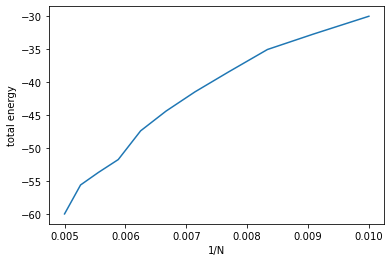

In [2]:
from matplotlib import pyplot as plt

Nlist = np.arange(100, 201, 10)
xlist = [1/i for i in Nlist] 
ylist = []
plist = []
for i in Nlist:
    ae, pe = getenergy(i)
    ylist.append(ae)
    plist.append(pe) 
# plt.yscale('log')
plt.xlabel('1/N')
plt.ylabel('total energy')
plt.plot(xlist, ylist)
plt.savefig("fig/sc_exp2_e_hard.eps",format='eps')

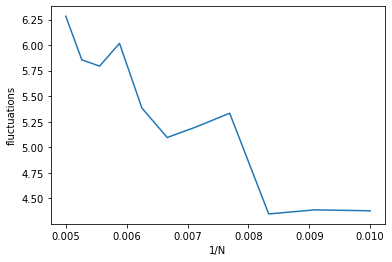

In [3]:
plt.plot(xlist, plist)
plt.xlabel('1/N')
plt.ylabel('fluctuations')
plt.savefig("fig/sc_exp2_p_hard.eps",format='eps')

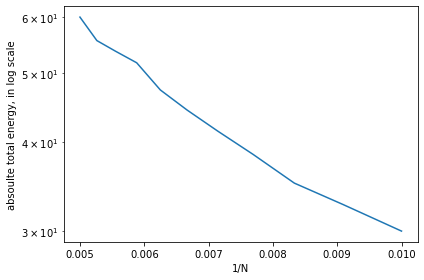

In [4]:
newlist = np.array(ylist)
newlist*=-1
plt.yscale('log')
plt.ylabel('absoulte total energy, in log scale')
plt.xlabel('1/N')
plt.plot(xlist, newlist)
plt.tight_layout()
plt.savefig("fig/sc_exp2_loge_hard.eps",format='eps')

In [5]:
ylist

[-30.011614979335214,
 -32.70796978910237,
 -35.05522463350979,
 -38.46913154114128,
 -41.479329103212265,
 -44.402718232352115,
 -47.39207291940111,
 -51.748989796125144,
 -53.70699692413216,
 -55.60232475091072,
 -59.994207324767366]

In [6]:
plist

[4.377615414166447,
 4.386592517748182,
 4.346964728338778,
 5.333065837952921,
 5.198978173235851,
 5.095095373468879,
 5.383790131965032,
 6.016731337757642,
 5.793842119855691,
 5.85572726588655,
 6.282257848206238]

In [7]:
np.array(plist)**2

array([19.16351671, 19.24219392, 18.89610235, 28.44159123, 27.02937405,
       25.95999686, 28.98519619, 36.20105599, 33.56860651, 34.28954181,
       39.46676367])